# Plots for the Bias-Variance Tradeoff

Generates the plots for the bias-variance tradeoff in the paper.

In [55]:
%config Completer.use_jedi = False
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
%matplotlib inline
import sys
sys.path.append('..')
from plot_config import fd_params, rfd_params, sjlt_rp_params, gauss_rp_params, gauss_hs_params, sjlt_hs_params 

In [14]:
r1 = 77 #51
fname = 'bias-variance-tradeoff_'+str(r1)+'.npy'
res = np.load(fname,allow_pickle=True)[()]

In [15]:
res

{'Gammas': array([3.90625e-03, 7.81250e-03, 1.56250e-02, 3.12500e-02, 6.25000e-02,
        1.25000e-01, 2.50000e-01, 5.00000e-01, 1.00000e+00, 2.00000e+00,
        4.00000e+00, 8.00000e+00, 1.60000e+01, 3.20000e+01, 6.40000e+01]),
 'Opt': {'Bias': array([0.        , 0.78776021, 0.79405747, 0.79812339, 0.80089447,
         0.80307822, 0.80509648, 0.80713066, 0.80939679, 0.81243818,
         0.81725589, 0.82493725, 0.83548536, 0.84711154, 0.85738333]),
  'Variance': array([0.00000000e+00, 5.73302473e+02, 2.93133596e+02, 1.49471890e+02,
         7.60708012e+01, 3.87728529e+01, 1.98092267e+01, 1.01323064e+01,
         5.18833594e+00, 2.66167769e+00, 1.36892076e+00, 7.06088122e-01,
         3.65222396e-01, 1.89304893e-01, 9.82694854e-02]),
  'MSE': array([  0.        , 574.09023364, 293.92765349, 150.27001376,
          76.87169567,  39.57593107,  20.61432316,  10.93943703,
           5.99773272,   3.47411586,   2.18617665,   1.53102537,
           1.20070776,   1.03641644,   0.95565282]),


In [21]:
opt  = res['Opt']
fd   = res['FD']
rfd  = res['RFD']
cl_g = res['C:G']
cl_s = res['C:S']
hs_g = res['H:G']
hs_s = res['H:S']

Text(0, 0.5, 'Relative Error')

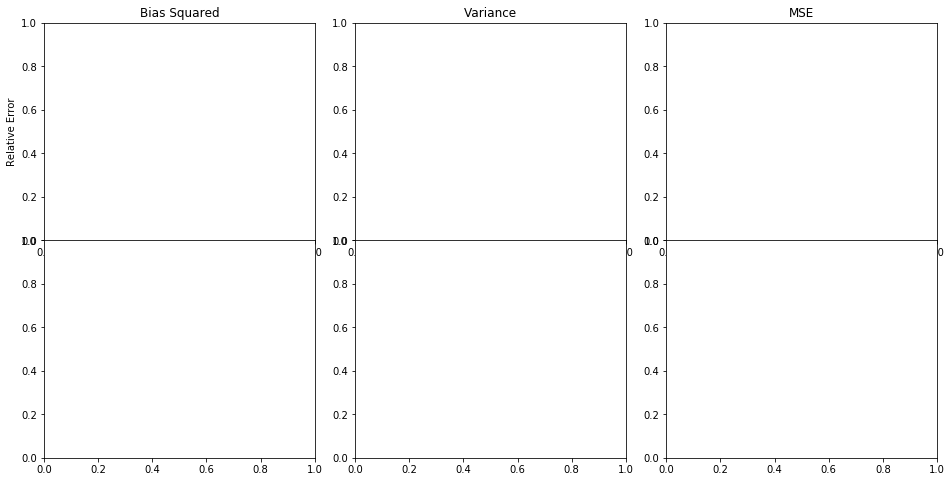

In [17]:
all_gammas = res['Gammas']

In [61]:
# def myLogFormat(y,pos):
#     # Find the number of decimal places required
#     decimalplaces = int(np.maximum(-np.log10(y),5))     # =0 for numbers >=1
#     # Insert that number into a format string
#     formatstring = '{{:.{:1d}f}}'.format(decimalplaces)
#     # Return the formatted tick label
#     return formatstring.format(y)

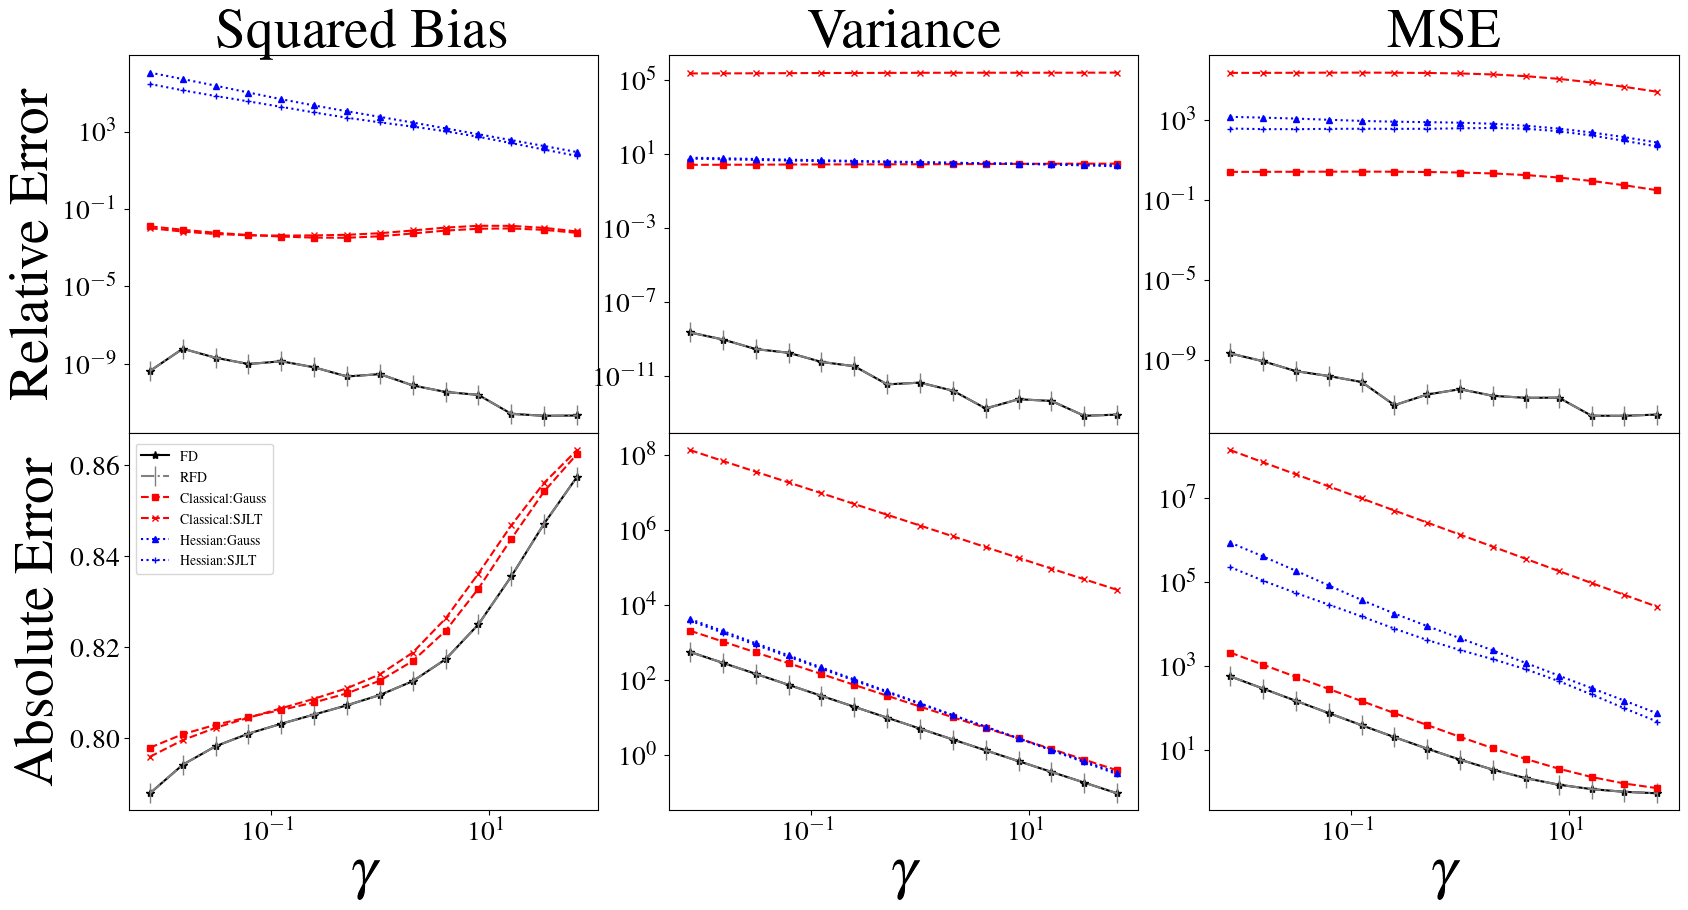

In [133]:
# Make the plots 
fig, ax = plt.subplots(nrows=2,ncols=3,
                       gridspec_kw = {'wspace':0.15, 'hspace':0.0},
                       figsize=(20,10),dpi=100)
# Row 1 is the relative error plots
# Bias-Variance-MSE
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40


ax[0,0].title.set_text("Squared Bias")
ax[0,1].title.set_text("Variance")
ax[0,2].title.set_text("MSE")
ax[0,0].set_ylabel("Relative Error")


for ax_i,measure in enumerate(['Bias', 'Variance', 'MSE']):
        finite_ids = np.where(opt[measure] > 0.)[0]
        gammas_finite = all_gammas[finite_ids]
        fd_rel_err = np.abs(opt[measure][finite_ids]- fd[measure][finite_ids])/ opt[measure][finite_ids]
        rfd_rel_err = np.abs(opt[measure][finite_ids]- rfd[measure][finite_ids])/ opt[measure][finite_ids]
        rp_g_rel_err = np.abs(opt[measure][finite_ids]- cl_g[measure][finite_ids])/ opt[measure][finite_ids]
        rp_s_rel_err = np.abs(opt[measure][finite_ids]- cl_s[measure][finite_ids])/ opt[measure][finite_ids]
        hs_g_rel_err = np.abs(opt[measure][finite_ids]- hs_g[measure][finite_ids])/ opt[measure][finite_ids]
        hs_s_rel_err = np.abs(opt[measure][finite_ids]- hs_s[measure][finite_ids])/ opt[measure][finite_ids]

        ax[0,ax_i].plot(gammas_finite,fd_rel_err,label='FD',**fd_params)
        ax[0,ax_i].plot(gammas_finite,rfd_rel_err,label='RFD',**rfd_params)
        ax[0,ax_i].plot(gammas_finite,rp_g_rel_err,label='Classical:Gauss', **gauss_rp_params)
        ax[0,ax_i].plot(gammas_finite,rp_s_rel_err,label='Classical:SJLT', **sjlt_rp_params)
        ax[0,ax_i].plot(gammas_finite,hs_g_rel_err,label='Hessian:Gauss', **gauss_hs_params)
        ax[0,ax_i].plot(gammas_finite,hs_s_rel_err,label='Hessian:SJLT', **sjlt_hs_params)
        ax[0,ax_i].set_yscale('log', basey=10)
        ax[0,ax_i].set_xscale('log', basex=10)
        ax[0,ax_i].tick_params(
            axis='x',          # changes apply to the x-axis
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False) # labels along the bottom edge are off
        ax[0,ax_i].tick_params(axis='y',labelsize=20.)
        #ax[0,ax_i].set_yticklabels(gammas_finite,rotation=45)

        

# Row 2 is the absolute value plots
ax[1,0].set_ylabel("Absolute Error")
for ax_i,measure in enumerate(['Bias', 'Variance', 'MSE']):
    finite_ids = np.where(opt[measure] > 0.)[0]
    gammas_finite = all_gammas[finite_ids]
    #opt_m = opt[measure][finite_ids]
    #print(opt_m)
    fd_m = fd[measure][finite_ids]
    rfd_m = rfd[measure][finite_ids]
    cl_mg = cl_g[measure][finite_ids]
    hs_mg = hs_g[measure][finite_ids]
    cl_ms = cl_s[measure][finite_ids]
    hs_ms = hs_s[measure][finite_ids]
    # if measure == 'Bias':
    #     print(np.c_[fd_m,rfd_m,cl_m,hs_m])

    #ax[1,ax_i].plot(gammas_finite,opt_m,label='OPT',color='cyan',marker='+',markersize=10)

    ax[1,ax_i].plot(gammas_finite,fd_m,label='FD',**fd_params)
    ax[1,ax_i].plot(gammas_finite,rfd_m,label='RFD',**rfd_params)
    ax[1,ax_i].plot(gammas_finite,cl_mg,label='Classical:Gauss', **gauss_rp_params)
    ax[1,ax_i].plot(gammas_finite,cl_ms,label='Classical:SJLT', **sjlt_rp_params)
    if measure != 'Bias':
        ax[1,ax_i].plot(gammas_finite,hs_mg,label='Hessian:Gauss', **gauss_hs_params)
        ax[1,ax_i].plot(gammas_finite,hs_ms,label='Hessian:SJLT', **sjlt_hs_params)
    if ax_i > 0: # Override log scale for ax[1,0] as similar magnitude
        ax[1,ax_i].set_yscale('log', basey=10)
    #ax[1,ax_i].set_yscale('log', basey=10)
    ax[1,ax_i].set_xscale('log', basex=10)
    ax[1,ax_i].set_xlabel(r'$\gamma$')
    ax[1,ax_i].tick_params(labelsize=20.)
    #ax[1,ax_i].xaxis.labelpad = - 20

    
# # Tidying the axes
# formatter = ticker.FuncFormatter(MyTicks)
#ax[1,0].yaxis.ticklabel_format(style='plain')


lines = []
labels = []

axLine, axLabel = ax[0,0].get_legend_handles_labels()
lines.extend(axLine)
labels.extend(axLabel)

    
ax[1,0].legend(lines, labels,loc='upper left', bbox_to_anchor=(0, 0.99))

In [126]:
#fig.tight_layout()
#plt.tight_layout()
#plt.subplots_adjust(bottom=0.3,top=0.5)
fig.savefig('test.eps',format='eps',dpi=1200)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
